<a href="https://colab.research.google.com/github/guilherme-argentino/fiap-ia4devs-techchallenge-fase1/blob/main/Fase1_TechChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Arquivo se chama 'dados.csv'
import pandas as pd
import statsmodels.api as sm

# Carregar a base de dados
df = pd.read_csv('dados.csv')

In [2]:
# Explorar as características da base de dados
# Mostrar as primeiras linhas do dataframe
print(df.head())

   idade     gênero        imc  filhos fumante    região      encargos
0     56   feminino  29.774374       2     sim  sudoeste  31109.889763
1     46  masculino  25.857395       1     não  nordeste  26650.702647
2     32  masculino  23.014840       0     não  sudoeste  21459.037990
3     34   feminino  28.918091       0     não     norte  19358.299923
4     29  masculino  30.002125       2     sim       sul  23045.983233


In [3]:
# Mostrar informações gerais do dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     157 non-null    int64  
 1   gênero    157 non-null    object 
 2   imc       157 non-null    float64
 3   filhos    157 non-null    int64  
 4   fumante   157 non-null    object 
 5   região    157 non-null    object 
 6   encargos  157 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.7+ KB
None


In [4]:
# Estatísticas descritivas das colunas numéricas
print(df.describe())

            idade         imc      filhos      encargos
count  157.000000  157.000000  157.000000    157.000000
mean    41.579618   28.014060    1.987261  28763.267109
std      8.583771    3.523498    1.395906   9157.661097
min     26.000000   22.456322    0.000000  17502.392123
25%     34.000000   23.847124    1.000000  20023.981230
50%     41.000000   28.847124    2.000000  27023.981230
75%     49.000000   30.984712    3.000000  37023.981230
max     60.000000   32.489712    4.000000  50021.384920


In [5]:
# Estatísticas descritivas das colunas categóricas
print(df.describe(include=['object']))

           gênero fumante    região
count         157     157       157
unique          2       2         5
top     masculino     não  sudoeste
freq           79     115        33


In [6]:
# Contagem de valores únicos em cada coluna
for column in df.columns:
    print(f"Valores únicos na coluna {column}:")
    print(df[column].value_counts())
    print()

Valores únicos na coluna idade:
idade
41    10
50    10
38    10
45     8
34     8
29     8
42     8
53     7
32     6
49     6
33     6
44     6
28     6
36     5
57     5
37     5
35     5
47     5
55     4
56     4
39     4
46     4
48     3
52     2
40     2
26     2
31     2
30     1
27     1
60     1
43     1
51     1
54     1
Name: count, dtype: int64

Valores únicos na coluna gênero:
gênero
masculino    79
feminino     78
Name: count, dtype: int64

Valores únicos na coluna imc:
imc
30.847124    27
31.847124    26
23.847124    18
22.847124    17
27.847124    13
30.984712     6
31.984712     4
25.847124     3
22.984712     3
28.847124     2
24.847124     2
29.847124     2
30.874129     1
28.492385     1
26.123847     1
23.124124     1
25.293847     1
24.123847     1
31.484712     1
27.894712     1
26.394812     1
26.847124     1
24.671235     1
29.774374     1
25.857395     1
25.001235     1
23.014840     1
28.918091     1
30.002125     1
26.989234     1
31.834234     1
22.456322

In [7]:
# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

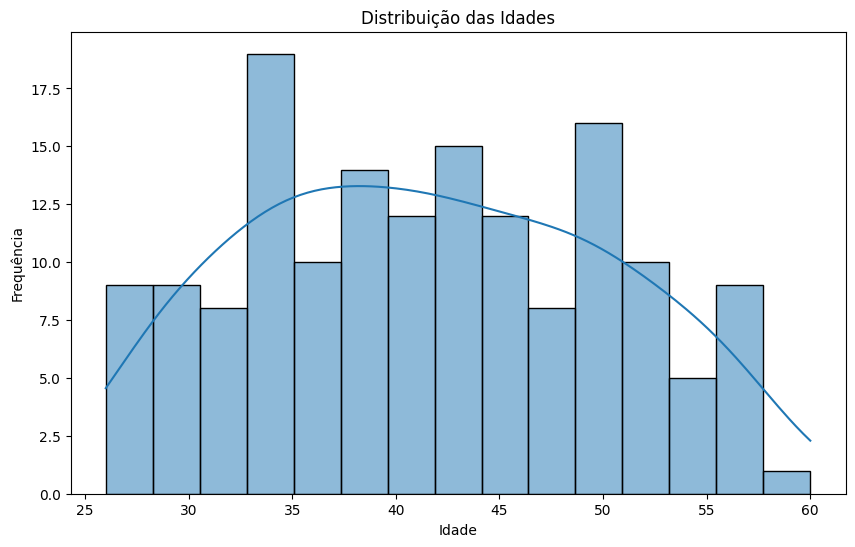

In [8]:
# Histograma das idades
plt.figure(figsize=(10, 6))
sns.histplot(df['idade'], bins=15, kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

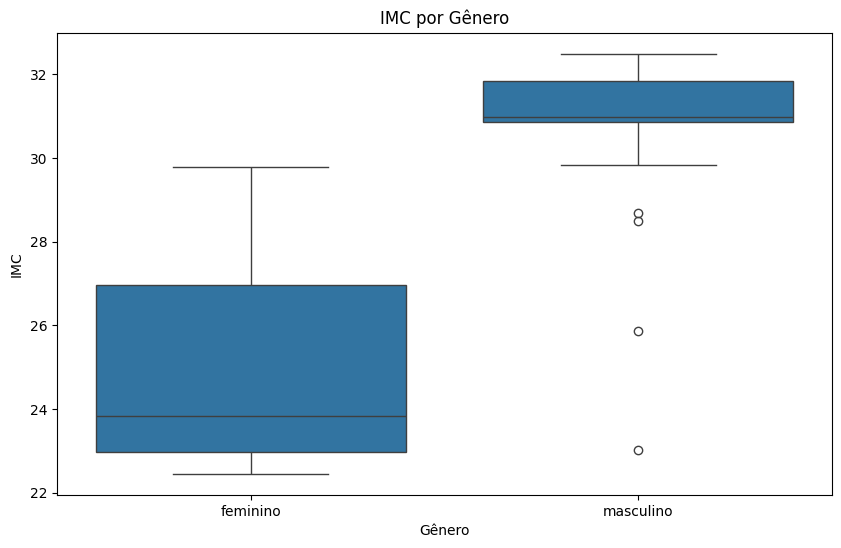

In [9]:
# Boxplot do IMC por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='gênero', y='imc', data=df)
plt.title('IMC por Gênero')
plt.xlabel('Gênero')
plt.ylabel('IMC')
plt.show()

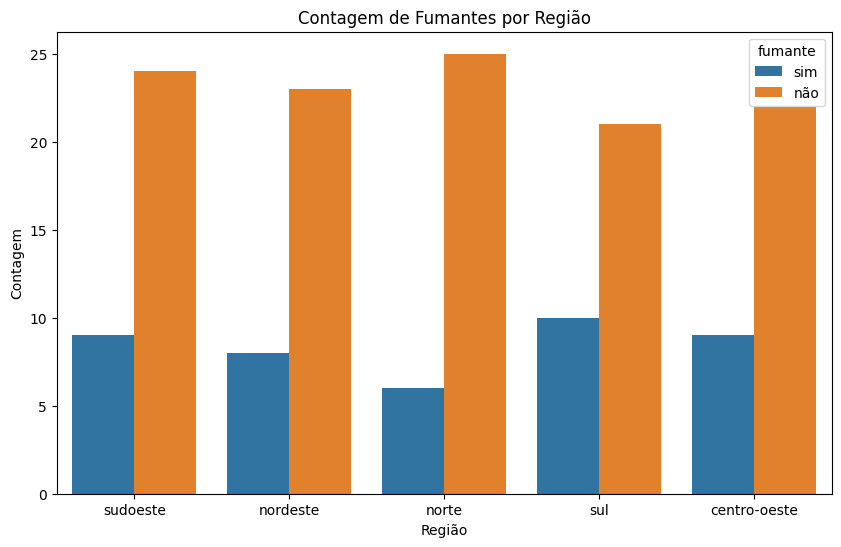

In [10]:
# Contagem de fumantes por região
plt.figure(figsize=(10, 6))
sns.countplot(x='região', hue='fumante', data=df)
plt.title('Contagem de Fumantes por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.show()

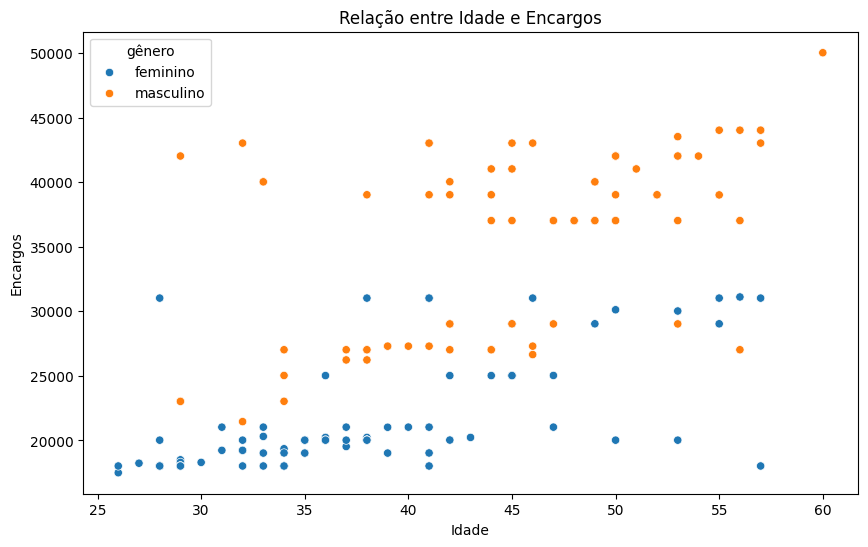

In [11]:
# Relação entre idade e encargos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='encargos', hue='gênero', data=df)
plt.title('Relação entre Idade e Encargos')
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.show()

In [ ]:
# ajustando variáveis categóricas
one_hot = pd.get_dummies(df, columns = ['gênero'])
one_hot = pd.get_dummies(one_hot, columns = ['fumante'])
one_hot = pd.get_dummies(one_hot, columns = ['região'])
print(one_hot.head())


In [12]:
# ajustando variáveis categóricas
df['gênero'].replace(['feminino', 'masculino'], [0, 1], inplace=True)
df['fumante'].replace(['sim', 'não'], [0, 1], inplace=True)
df['região'].replace(['sudoeste', 'nordeste','centro-oeste','sul','norte'], [0, 1, 2, 3, 4], inplace=True)

In [13]:
# exibir após o ajuste de variáveis categóricas
print(df.head())

   idade  gênero        imc  filhos  fumante  região      encargos
0     56       0  29.774374       2        0       0  31109.889763
1     46       1  25.857395       1        1       1  26650.702647
2     32       1  23.014840       0        1       0  21459.037990
3     34       0  28.918091       0        1       4  19358.299923
4     29       1  30.002125       2        0       3  23045.983233


In [14]:
# Criar regressão
# Definindo variáveis independentes

# Definir as variáveis independentes (X)
X = df[['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região']]

# Definir a variável dependente (Y)
Y = df['encargos']

# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
print(modelo.summary())





                                 OLS Regression Results                                
Dep. Variable:               encargos   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2832.
Date:                Tue, 28 May 2024   Prob (F-statistic):                   2.01e-152
Time:                        23:15:22   Log-Likelihood:                         -1470.7
No. Observations:                 157   AIC:                                      2953.
Df Residuals:                     151   BIC:                                      2972.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np

# realizar as previsões

y_pred = modelo.predict(X)

# Calcular MAE, MSE e RMSE

mae = mean_absolute_error(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)

# Imprimir as métricas

print(f'MAE: {mae}') # erro médio absoluto (MAE — do inglês Mean Absoluto Error
print(f'MSE: {mse}') #erro quadrático médio (MSE — do inglês Mean Squared Error)
print(f'RMSE: {rmse}') # raiz do erro quadrático médio (RMSE — do inglês, Root Mean Squared Error)

MAE: 2167.525331026858
MSE: 8021192.611391551
RMSE: 2832.1710067352133


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Converter variáveis categóricas em formatos adequados para modelagem
categorical_columns = ['gênero', 'fumante', 'região', 'idade', 'imc', 'filhos']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop('encargos', axis=1)
y = df_encoded['encargos']

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.704448029333141e+31
R^2 Score: -1.112284853704776e+24


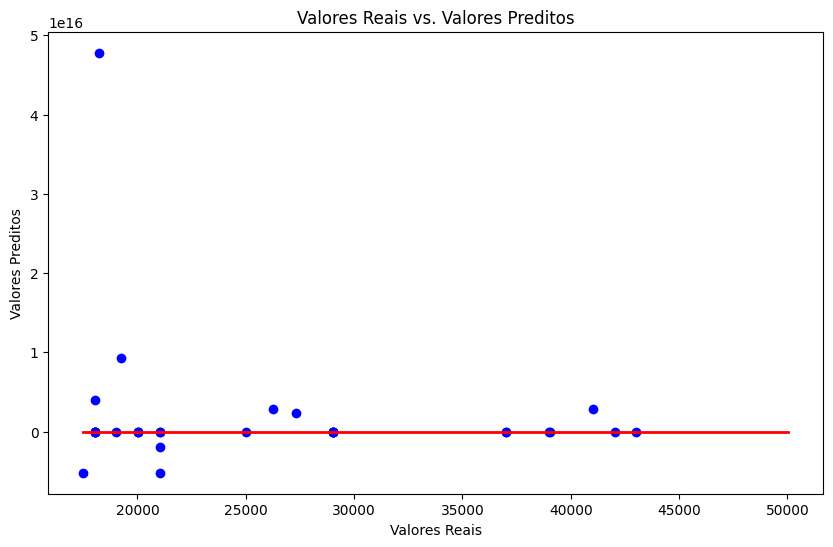

In [17]:
# Plotar os resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()

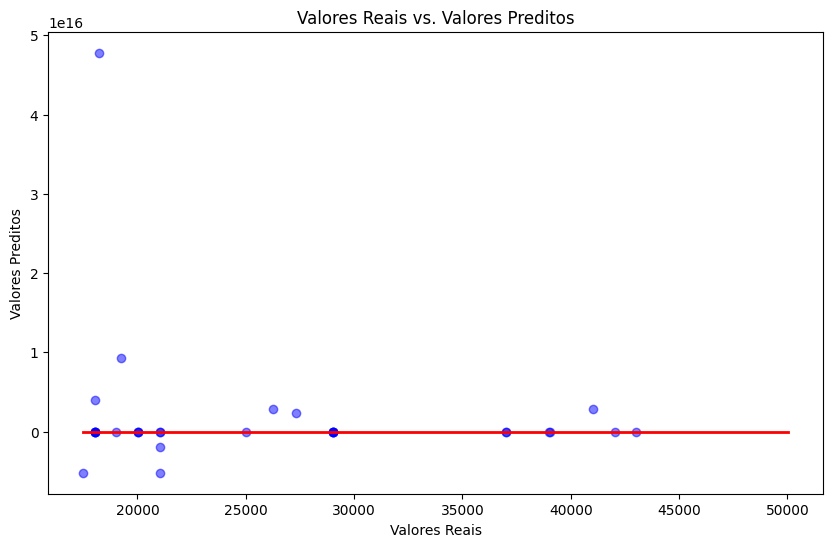

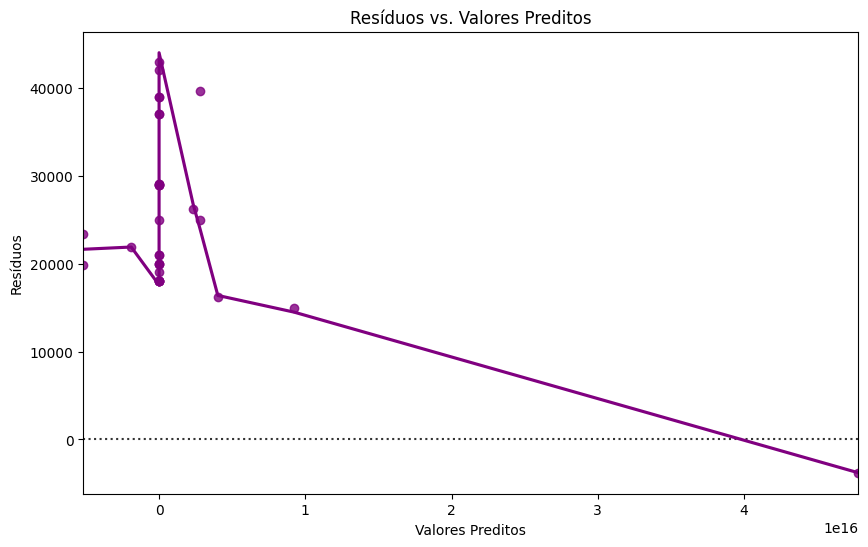

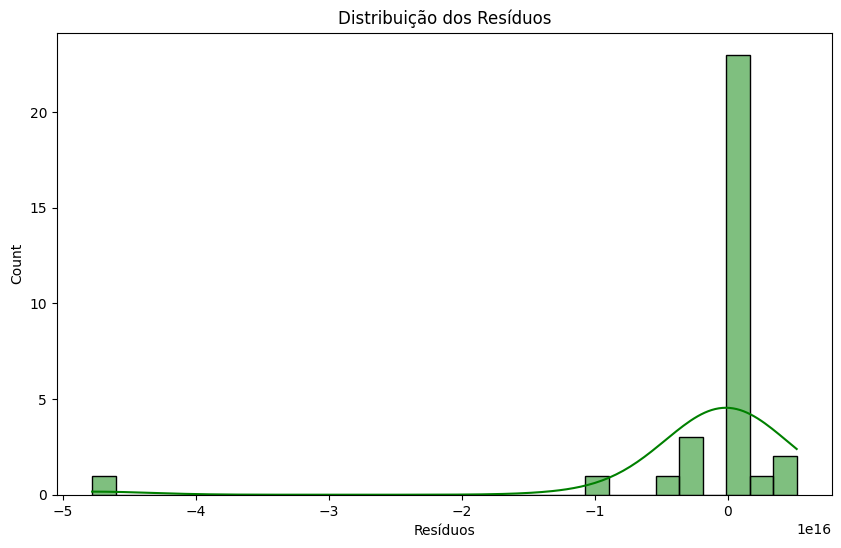

In [18]:
# Visualização dos resultados
import matplotlib.pyplot as plt
import seaborn as sns


# Gráfico de dispersão dos valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()

# Resíduos vs Valores Ajustados
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True, color='purple')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Preditos')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='green')
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()